# **Trabalho \#2**:  Aprendizado de Máquina e Reconhecimento de Padrões MC886/MO444

### Cabeçalho

Instituto de Computação (IC/UNICAMP), 2ᵒ Semestre, 2024

Profa. Sandra Avila, 2024s2

Trabalho proposto por Caio Petrucci Rosa (PAD), Cesar Guedes Carneiro (PED) e Sandra Avila.



In [1]:
print('231081: ' + 'Pedro da Rosa Pinheiro')
print('225334: ' + 'Jonatas de Sousa Santos')

231081: Pedro da Rosa Pinheiro
225334: Jonatas de Sousa Santos


### Importação de bibliotecas

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

## Objetivo

Explore os modelos de **regressão linear** e **regressão logística** e apresente o melhor modelo que você encontrar para o problema, evitando o *overfitting*. Em particular, realize predições acerca do salário dos profissionais da área de dados no Brasil, com base nos dados da pesquisa State of Data Brazil 2023, levando em consideração variáveis como perfil demográfico, formação, experiência e atuação no setor.

---

## Base de Dados

#### **Dicionário de dados:**

A base de dados deste trabalho foi criado a partir de dados disponibilizados em [State of Data Brazil 2023](https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-2023). Os dados refletem a pesquisa realizada com profissionais da área de Ciência de Dados no Brasil. As respostas foram coletadas em 2023 e a base de dados contém uma ampla variedade de perguntas sobre o perfil demográfico, situação profissional e conhecimentos técnicos dessas pessoas.


* **id**: Identificador único da pessoa participante;

* **idade**: Idade da pessoa participante;

* **genero**: Gênero da pessoa participante;

* **cor_raca**: Cor/raça/etnia da pessoa participante;

* **pcd**: Se a pessoa participante possui alguma deficiência (PCD);

* **estado_residencia**: Estado onde a pessoa participante mora;

* **mudou_estado**: Se a pessoa participante mudou de estado recentemente;

* **regiao_origem**: Região de origem da pessoa participante;

* **nivel_ensino**: Nível de ensino da pessoa participante;

* **area_formacao**: Área de formação acadêmica;

* **situacao_trabalho**: Situação atual de trabalho;

* **setor**: Setor em que a pessoa participante trabalha;

* **numero_funcionarios**: Número de funcionários na empresa onde a pessoa participante trabalha;

* **gestor**: Se a pessoa participante é gestor na empresa;

* **cargo**: Cargo da pessoa participante;

* **nivel_profissional**: Nível profissional da pessoa participante;

* **tempo_exp_dados**: Tempo de experiência na área de dados;

* **tempo_exp_ti**: Tempo de experiência prévia na área de TI ou Engenharia de Software antes de atuar com dados;

* **satisfacao_empresa**: Nível de satisfação da pessoa participante com sua empresa atual;

* **forma_trabalho_atual**: Forma de trabalho atual (presencial, remoto, híbrido);

* **atuacao_dia_a_dia**: Reflexão da atuação da pessoa participante no dia a dia em relação ao cargo formal;

* **fontes_dados_analise**: Fontes de dados já analisadas ou processadas pela pessoa participante no trabalho;

* **fontes_dados_uso**: Fontes de dados mais utilizadas pela pessoa participante no trabalho;

* **linguagens_trabalho**: Linguagens de programação utilizadas no trabalho;

* **linguagem_mais_usada**: Linguagem de programação mais utilizada no trabalho;

* **linguagem_preferida**: Linguagem de programação preferida da pessoa participante;

* **bancos_dados_trabalho**: Bancos de dados utilizados no trabalho;

* **cloud_preferida**: Cloud preferida da pessoa participante;

* **cloud_usada**: Cloud usada no trabalho;

* **ferramenta_bi_dia_a_dia**: Ferramenta de BI utilizada no dia a dia;

* **ferramenta_bi_preferida**: Ferramenta de BI preferida;

* **tipo_uso_ai**: Tipo de uso de AI Generativa e LLMs na empresa;

* **uso_chatgpt**: Se a pessoa participante utiliza ChatGPT ou LLMs no trabalho;

* **faixa_salarial**: Faixa salarial da pessoa participante;

* **salario**: Valor do salário da pessoa participante.


Você deve **respeitar a seguinte divisão de treino/teste**:

    train_data.csv
    test_data.csv

Lembre-se de criar **seu próprio conjunto de validação**, a partir um subconjunto do conjunto de treinamento, e utilize o conjunto de teste (a ser disponibilizado) apenas para inferência e relato do resultado final.

### Atividades

#### 1. (0,4 pontos) Realize a limpeza e preparação dos dados de treinamento.

  > **Considere os seguintes fatores:**
  > - Existem outliers nos dados? Se sim, como você pretende tratá-los (removê-los, ajustá-los, ou usar uma abordagem alternativa)?
  > - Há valores ausentes? Se sim, como irá lidar com eles? (Ex.: exclusão de linhas, preenchimento por média/mediana/moda, ou outros métodos).
  > - Como você planeja tratar variáveis categóricas? (Ex.: one-hot encoding, label encoding, ou outra estratégia).

In [3]:
# Carregando dados
df_raw = pd.read_csv("train_data.csv")

# Removendo coluna id
df= df_raw.drop(["id"], axis=1)

In [4]:
# Variáveis não categóricas
numeric_features = ['idade', 'salario']

idade_scaler = MinMaxScaler()
df['idade'] = idade_scaler.fit_transform(df[['idade']])

In [5]:
# Variáveis binárias mapeadas com 0 e 1
binary_features = ['mudou_estado', 'satisfacao_empresa']

# Variáveis binárias não mapeadas ainda:
df = df[df['genero'] != 'Outro']
df = df[df['genero'] != "Prefiro não informar"]
df = df[df['pcd'] != "Prefiro não informar"]
df['genero'] = df['genero'].map({'Masculino': 1.0, 'Feminino': 0.0})
df['pcd'] = df['pcd'].map({'Sim': 1.0, 'Não': 0.0})
binary_features.append('genero')
binary_features.append('pcd')

In [6]:
# Variáveis categóricas ordinais
df = df[df['nivel_ensino'] != "Prefiro não informar"] # Removendo 5 registros
df = df[df['numero_funcionarios'] != "de 501 a 100"] # Removendo 1 registro

# Ajustando categorias de poucas instâncias/categorias incosistentes
df['numero_funcionarios'] = df['numero_funcionarios'].map(
    {
        'de 1 a 5': 'de 1 a 100',
        'de 6 a 10': 'de 1 a 100',
        'de 11 a 50': 'de 1 a 100',
        'de 51 a 100': 'de 1 a 100',
        'de 101 a 500': 'de 101 a 500',
        'de 501 a 1.000': 'de 501 a 1.000',
        'de 1.001 a 3.000': 'de 1.001 a 3.000',
        'Acima de 3.000': 'Acima de 3.000'
    }
)

# Realizando Ordinal Encoder para numero_funcionarios
encoder_numero_funcionarios = OrdinalEncoder(
    categories=[[
        'de 1 a 100', 
        'de 101 a 500', 
        'de 501 a 1.000', 
        'de 1.001 a 3.000', 
        'Acima de 3.000'
    ]]
)
df['numero_funcionarios'] = encoder_numero_funcionarios.fit_transform(df[['numero_funcionarios']])

# Preenchendo lacuas vazias nivel_profissional
df['nivel_profissional'] = df['nivel_profissional'].fillna("Gestor")

# Realizando Ordinal Encoder para numero_funcionarios
encoder_nivel_profissional = OrdinalEncoder(categories=[["Júnior", "Pleno", "Sênior", "Gestor"]])
df['nivel_profissional'] = encoder_nivel_profissional.fit_transform(df[['nivel_profissional']])
df = df.drop(['gestor'], axis=1)

# Realizando Ordinal Encoder para faixa_salarial
encoder_faixa_salarial = OrdinalEncoder(
    categories=[[
        'de R$ 101/mês a R$ 2.000/mês', 
        'Menos de R$ 1.000/mês', 
        'de R$ 1.001/mês a R$ 2.000/mês', 
        'de R$ 2.001/mês a R$ 3.000/mês', 
        'de R$ 3.001/mês a R$ 4.000/mês', 
        'de R$ 4.001/mês a R$ 6.000/mês', 
        'de R$ 6.001/mês a R$ 8.000/mês', 
        'de R$ 8.001/mês a R$ 12.000/mês', 
        'de R$ 12.001/mês a R$ 16.000/mês', 
        'de R$ 16.001/mês a R$ 20.000/mês', 
        'de R$ 20.001/mês a R$ 25.000/mês', 
        'de R$ 25.001/mês a R$ 30.000/mês', 
        'de R$ 30.001/mês a R$ 40.000/mês', 
        'Acima de R$ 40.001/mês'
    ]]
)
df['faixa_salarial'] = encoder_faixa_salarial.fit_transform(df[['faixa_salarial']])

# Ajustando categoria incosistente de tempo_exp_dados
df['tempo_exp_dados'] = df['tempo_exp_dados'].apply(
    lambda x: 'de 4 a 6 anos' if x == 'de 5 a 6 anos' else x
)

# Realizando Ordinal Encoder para tempo_exp_dados
encoder_tempo_exp_dados = OrdinalEncoder(
    categories=[[
        'Não tenho experiência na área de dados', 
        'Menos de 1 ano', 
        'de 1 a 2 anos', 
        'de 3 a 4 anos', 
        'de 4 a 6 anos', 
        'de 5 a 6 anos', 
        'de 7 a 10 anos', 
        'Mais de 10 anos'
    ]]
)
df['tempo_exp_dados'] = encoder_tempo_exp_dados.fit_transform(df[['tempo_exp_dados']])

# Realizando Ordinal Encoder para tempo_exp_ti
encoder_tempo_exp_ti = OrdinalEncoder(
    categories=[[
        'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados',
        'Menos de 1 ano', 
        'de 1 a 2 anos', 
        'de 3 a 4 anos', 
        'de 5 a 6 anos', 
        'de 7 a 10 anos', 
        'Mais de 10 anos'
    ]]
)
df['tempo_exp_ti'] = encoder_tempo_exp_ti.fit_transform(df[['tempo_exp_ti']])

# Realizando Ordinal Encoder para nivel_ensino
encoder_nivel_ensino = OrdinalEncoder(
    categories=[[
        'Não tenho graduação formal', 
        'Estudante de Graduação', 
        'Graduação/Bacharelado',
        'Pós-graduação', 
        'Mestrado', 
        'Doutorado ou Phd'
    ]]
)
df['nivel_ensino'] = encoder_nivel_ensino.fit_transform(df[['nivel_ensino']])

# Declarando lista de features categóricas ordinarias
categorical_ordinary = ['nivel_ensino', 'numero_funcionarios', 'nivel_profissional', 'tempo_exp_dados', 'tempo_exp_ti', 'faixa_salarial']

In [7]:
# Variáveis categóricas nominais
categorical_nominal = ['cor_raca', 'estado_residencia', 'regiao_origem', 'area_formacao', 'situacao_trabalho', 'setor', 'cargo','forma_trabalho_atual', 'atuacao_dia_a_dia', 'fontes_dados_analise', 'fontes_dados_uso', 'linguagens_trabalho', 'linguagem_mais_usada', 'linguagem_preferida', 'bancos_dados_trabalho', 'cloud_preferida', 'cloud_usada', 'ferramenta_bi_dia_a_dia', 'ferramenta_bi_preferida', 'tipo_uso_ai', 'uso_chatgpt']

encoder_target = TargetEncoder(cols=categorical_nominal, min_samples_leaf=1, smoothing=100).fit(df, df['salario'])
features_encoded = encoder_target.transform(df)

encoded_scaler = MinMaxScaler()
features_encoded = encoded_scaler.fit_transform(features_encoded[categorical_nominal])

df = df.drop(categorical_nominal, axis=1)
df[categorical_nominal] = features_encoded

In [8]:
# Removendo valores nulos nos dados processados
original_size = df.shape[0]
df = df.dropna()
reduction = (original_size - df.shape[0]) / original_size
print(f"Redução de {reduction:.2%} devido a remoção de registros com valores nulos")

Redução de 2.13% devido a remoção de registros com valores nulos


A seguir é realizado um processo de remoção de outliers considerando a distribuição por classe.

In [9]:
df_size_before = df.shape[0]

for feature in categorical_ordinary:
    salary_mean_by_class = df.groupby(feature)['salario'].mean().to_dict()
    salary_std_by_class = df.groupby(feature)['salario'].std().to_dict()
    salary_outliers = df['salario'].copy()
    salary_means = df[feature].map(salary_mean_by_class)
    salary_outliers -= salary_means
    salary_std = df[feature].map(salary_std_by_class)
    salary_outliers /= salary_std
    salary_outliers = salary_outliers.abs()
    salary_outliers = salary_outliers[salary_outliers > 3]
    df = df.drop(salary_outliers.index)

df_size_after = df.shape[0]
print(f"Redução de {1 - df_size_after / df_size_before:.2%} devido a remoção de outliers")

Redução de 6.57% devido a remoção de outliers


#### 2. (0,5 pontos) Faça uma análise exploratória de dados.

  > Procure entender como os dados se comportam e as relações entre diferentes *features*.
  >
  > **Alguns fatores a serem considerados:** Quais as distribuição dos valores de cada atributos? Como é a correlação entre os diferentes atributos? Existe multicolinearidade entre algumas *features*?

As seguintes variáveis serão consideradas binárias, devido a sua distribuição e desigualdade entre classes:

* Gênero:
    * As categorias "Prefiro não informar" e "Outro" representavam menos de 0.004% dos dados, com 15 amostras, aumentando a complexidade do modelo sem prover informações estatisticamente significativas.
* PCD:
    * A categoria "Prefiro não informar" representava cerca de 0.005% do total de amostras, então também descartamos pelo mesmo argumento utilizado no gênero.

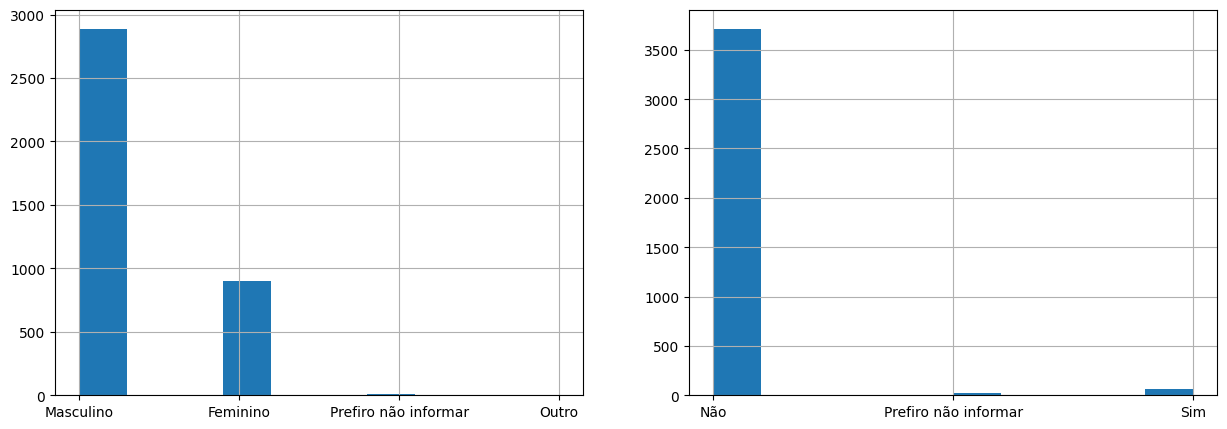

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_raw['genero'].hist(ax=axes[0])
df_raw['pcd'].hist(ax=axes[1])
plt.show()

As seguintes variávies categóricas possuiam uma categoria também pouquíssimo expressiva:
* numero_funcionarios:
    * "de 501 a 100": Intervalo com dificuldade de interpretação, possívelmente erro de digitação e somente uma amostra pertencente à classe. Resolvemos remove-la.
    * Como as categorias parecem conter uma ordem semântica, foi pensado em processar essa feature como uma variável categórica ordinal. Apesar disso, algumas classes pareciam ser um intervalo muito pequeno então unimos alguns intervalos gerando menos categorias e categorias um pouco menos desbalanceadas:

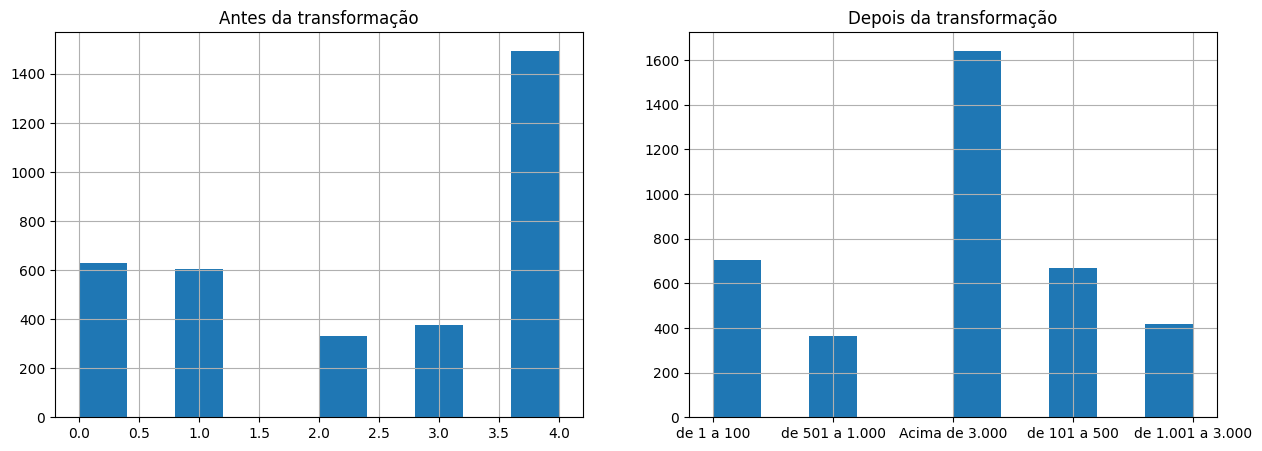

In [11]:
numero_funcionarios = df_raw['numero_funcionarios'].map({
    'de 1 a 5': 'de 1 a 100',
    'de 6 a 10': 'de 1 a 100',
    'de 11 a 50': 'de 1 a 100',
    'de 51 a 100': 'de 1 a 100',
    'de 101 a 500': 'de 101 a 500',
    'de 501 a 1.000': 'de 501 a 1.000',
    'de 1.001 a 3.000': 'de 1.001 a 3.000',
    'Acima de 3.000': 'Acima de 3.000'
})

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df['numero_funcionarios'].hist(ax=axes[0])
axes[0].set_title('Antes da transformação')
numero_funcionarios.hist(ax=axes[1])
axes[1].set_title('Depois da transformação')
plt.show()

Como era de se esperar, o nivel_profissional apresenta uma distribuição bem diferente para cada nível, o que demonstra que essa pode ser uma variável interessante para se utilizar na predição. É possível enxergar no boxplot que em média pessoas com nível Sênior tem maiores salários que pessoas em nível Pleno e Júnior. 

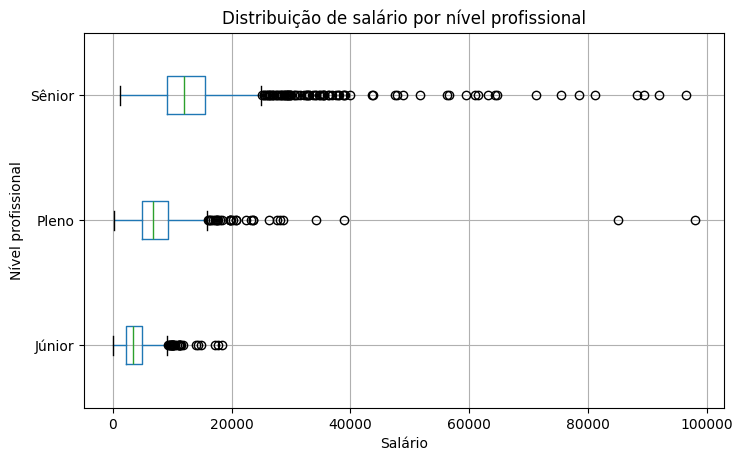

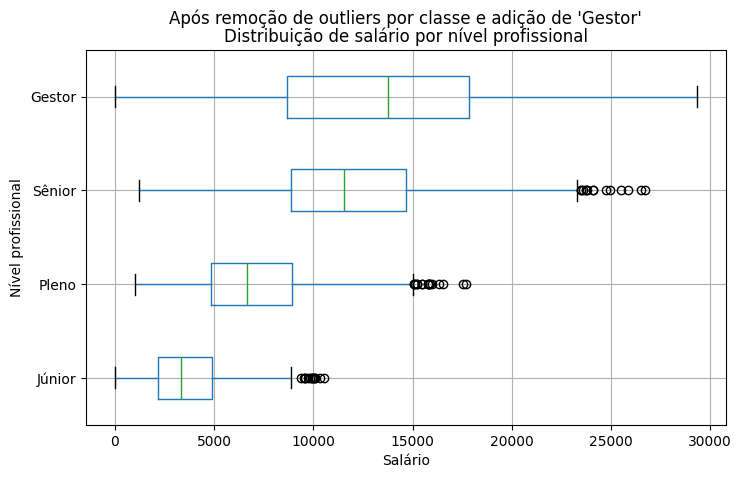

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
df_raw.boxplot(column='salario', by='nivel_profissional', vert=False, ax=ax)
plt.title('Distribuição de salário por nível profissional')
plt.suptitle('')
plt.xlabel('Salário')
plt.ylabel('Nível profissional')
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
df.boxplot(column='salario', by='nivel_profissional', vert=False, ax=ax)
plt.title('Distribuição de salário por nível profissional')
plt.suptitle("Após remoção de outliers por classe e adição de 'Gestor'")
plt.xlabel('Salário')
plt.ylabel('Nível profissional')
plt.yticks([1, 2, 3, 4], ['Júnior', 'Pleno', 'Sênior', 'Gestor'])
plt.show()

A categoria Gestor foi adicionado pois é possível verificar que todos os dados faltantes da classe "Nível Profissional" são ocorrências de "Sim" para a variável Gestor. Como o nível profissional será processado como uma variável categórica ordinal: propomos unir as duas features na seguinte ordem: 
    ["Júnior", "Pleno", "Sênior", "Gestor"]

Resposta para 'Gestor' quando 'Nível profissional' é NaN
gestor
1.0    719
Name: count, dtype: int64

Resposta para 'Gestor' quando 'Nível profissional' não é NaN
gestor
0.0    3083
Name: count, dtype: int64


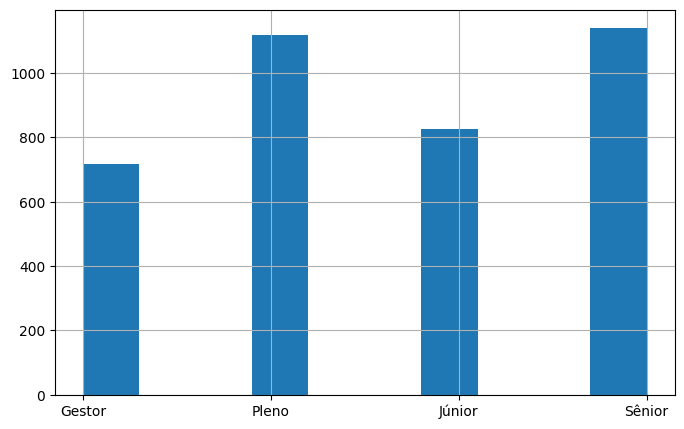

In [13]:
print("Resposta para 'Gestor' quando 'Nível profissional' é NaN")
print(df_raw[df_raw['nivel_profissional'].isna()]['gestor'].value_counts())

print("\nResposta para 'Gestor' quando 'Nível profissional' não é NaN")
print(df_raw[df_raw['nivel_profissional'].notna()]['gestor'].value_counts())

nivel_profissional = df_raw['nivel_profissional'].fillna("Gestor")
fig, ax = plt.subplots(figsize=(8, 5))
nivel_profissional.hist()
plt.show()

A variável tempo_exp_dados também possui intervalos inconsistentes:
* 'Não tenho experiência na área de dados'
* 'Menos de 1 ano'
* 'de 1 a 2 anos'
* 'de 3 a 4 anos' 
* 'de 4 a 6 anos' 
* 'de 5 a 6 anos'
* 'de 7 a 10 anos', 
* 'Mais de 10 anos'

Como não é possível entender como as amostras se dividiram entre 'de 4 a 6 anos' e 'de 5 a 6 anos', é interessante agrupar essas duas categorias:
* 'Não tenho experiência na área de dados'
* 'Menos de 1 ano'
* 'de 1 a 2 anos'
* 'de 3 a 4 anos' 
* 'de 4 a 6 anos' 
* 'de 7 a 10 anos', 
* 'Mais de 10 anos'

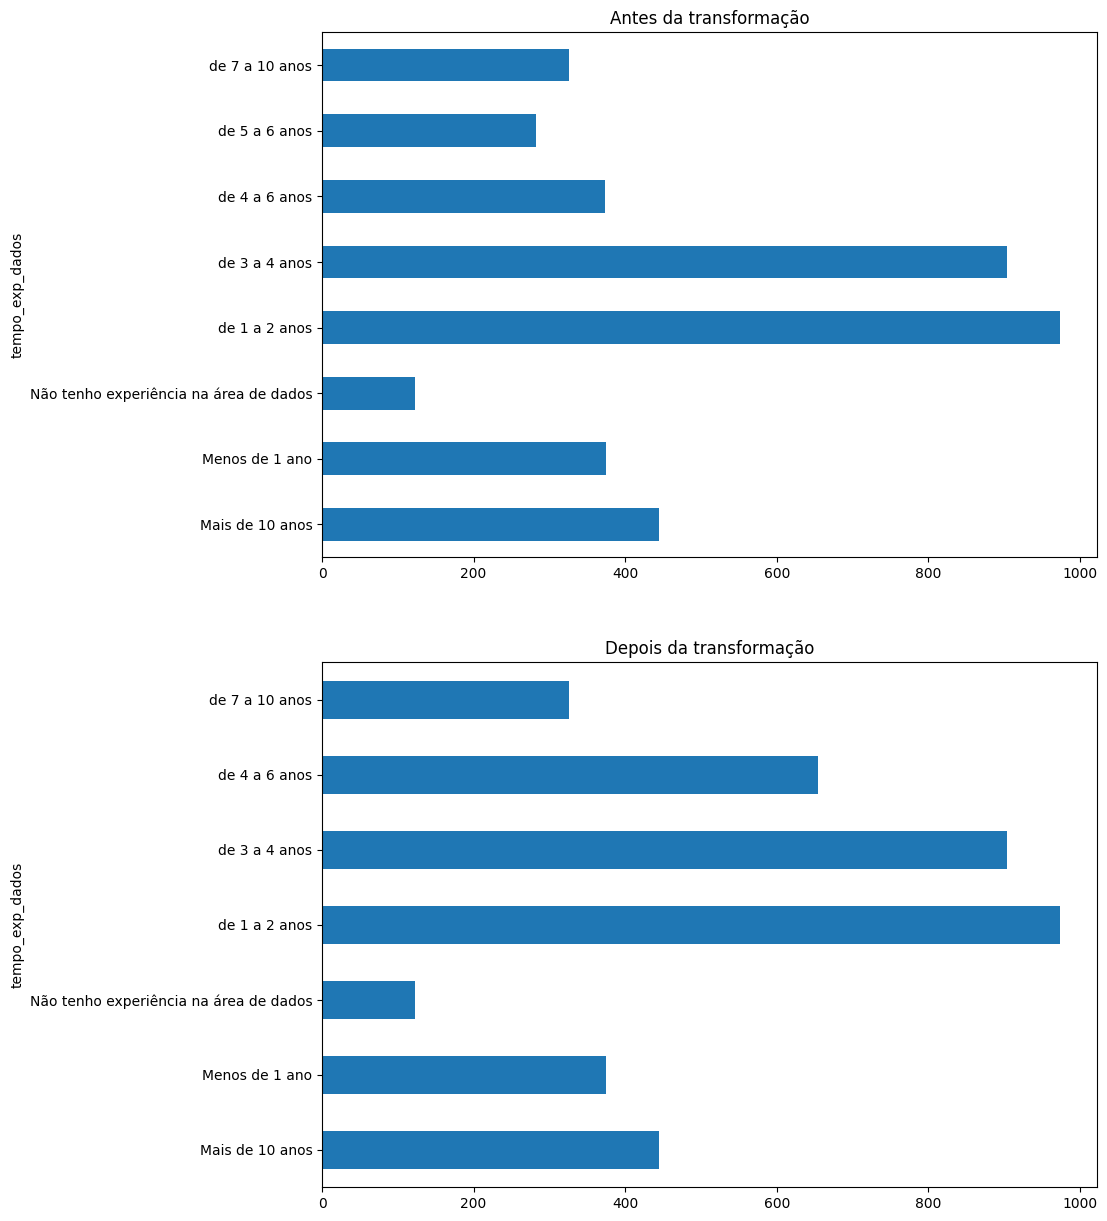

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(10, 15))
df_raw['tempo_exp_dados'].value_counts().sort_index().plot(ax=axes[0], kind='barh', title='Antes da transformação')
tempo_exp_dados = df_raw['tempo_exp_dados'].apply(
    lambda x: 'de 4 a 6 anos' if x == 'de 5 a 6 anos' else x
)
tempo_exp_dados.value_counts().sort_index().plot(ax=axes[1], kind='barh', title='Depois da transformação')
plt.show()

In [15]:
print("Lista das features com maior correlação com salário por Método de Pearson")
print(df.corr()["salario"].sort_values(ascending=False)[:12])

print("Lista das features com maior correlação com salário por Método de Spearman")
print(df.corr(method="spearman")["salario"].sort_values(ascending=False)[:12])

Lista das features com maior correlação com salário por Método de Pearson
salario                    1.000000
faixa_salarial             0.945265
nivel_profissional         0.671231
bancos_dados_trabalho      0.601364
tempo_exp_dados            0.599759
cargo                      0.502770
ferramenta_bi_dia_a_dia    0.495180
fontes_dados_analise       0.494002
linguagens_trabalho        0.449432
fontes_dados_uso           0.445657
atuacao_dia_a_dia          0.422764
tipo_uso_ai                0.413663
Name: salario, dtype: float64
Lista das features com maior correlação com salário por Método de Spearman
salario                    1.000000
faixa_salarial             0.987583
nivel_profissional         0.704547
bancos_dados_trabalho      0.662076
tempo_exp_dados            0.649540
fontes_dados_analise       0.508872
ferramenta_bi_dia_a_dia    0.489328
cargo                      0.459060
fontes_dados_uso           0.439557
linguagens_trabalho        0.435899
atuacao_dia_a_dia          0.

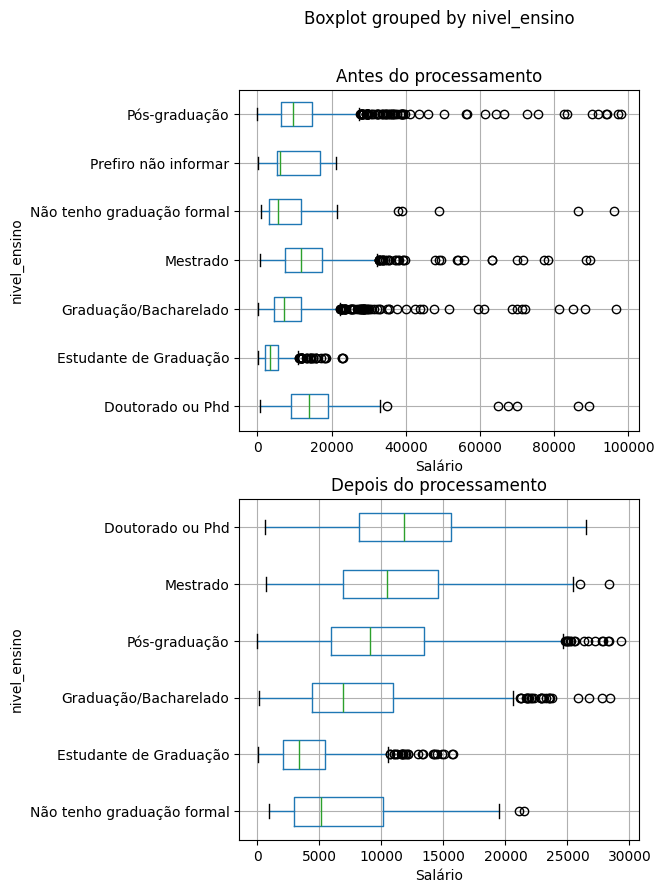

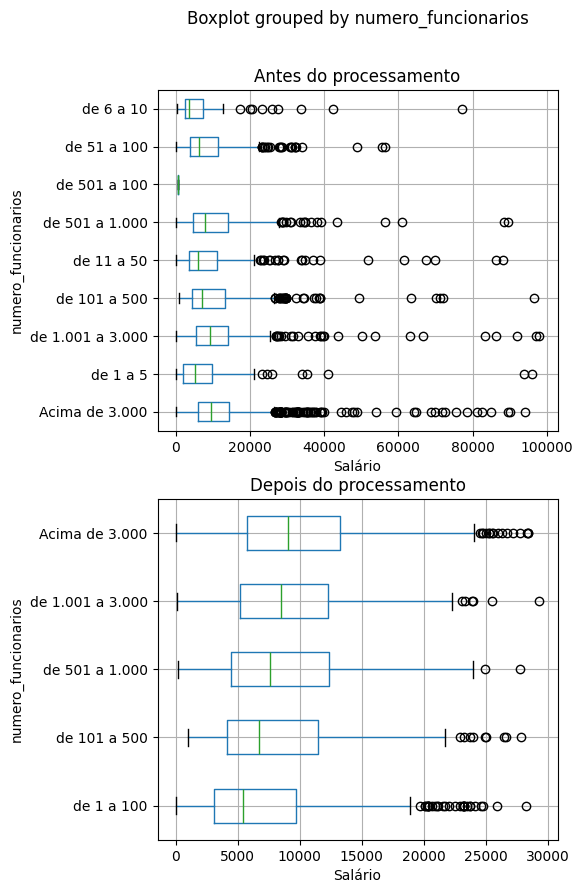

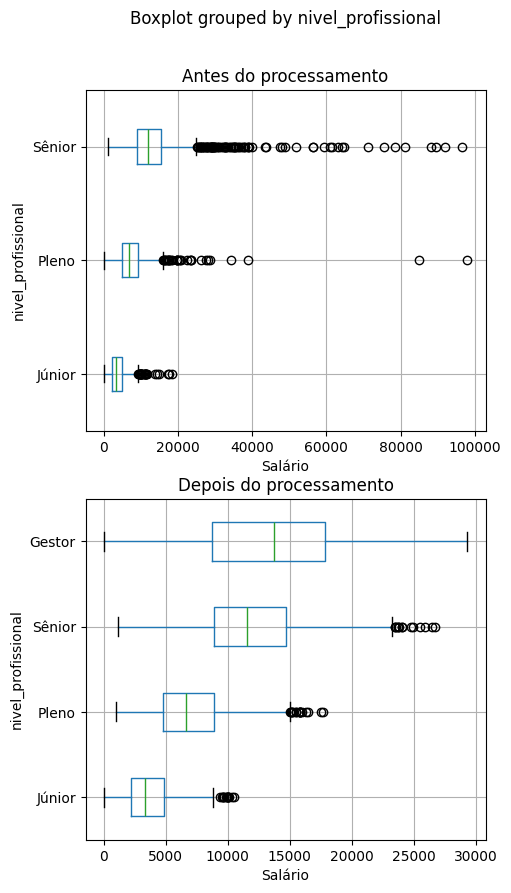

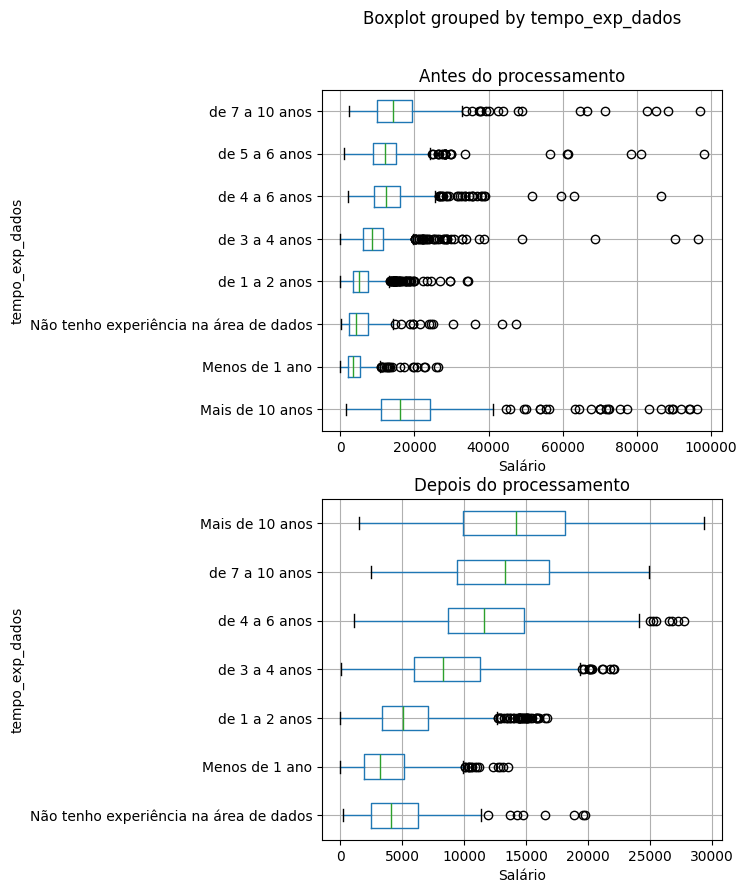

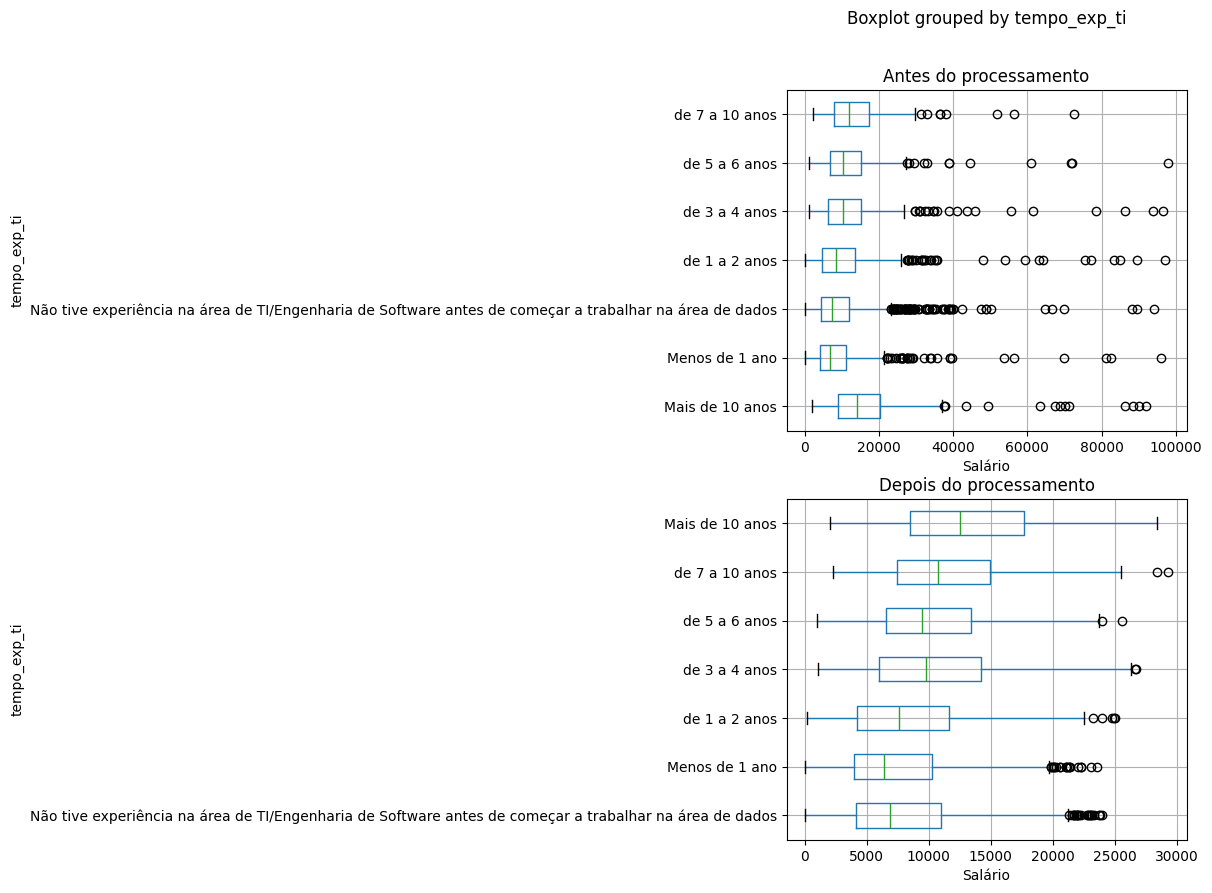

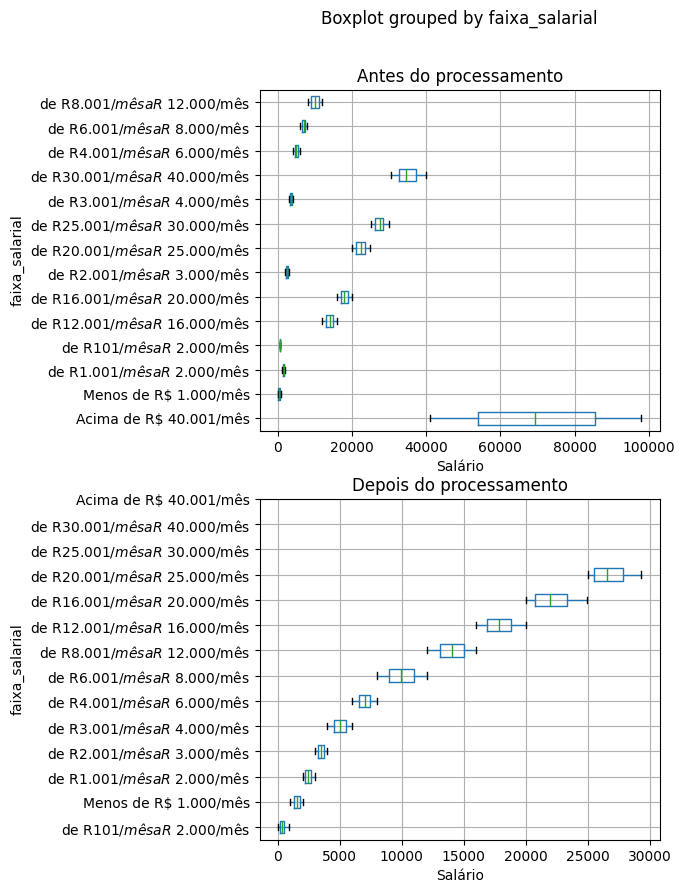

In [16]:
# Análise de seleção de features ordinais

# plotando salário por nivel_ensino
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
df_raw.boxplot(column="salario", by="nivel_ensino", vert=False, ax=axes[0])
axes[0].set_title('Antes do processamento')
axes[0].set_xlabel('Salário')
df.boxplot(column="salario", by="nivel_ensino", vert=False, ax=axes[1])
axes[1].set_title('Depois do processamento')
axes[1].set_xlabel('Salário')
axes[1].set_yticks(ticks=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0], labels=['Não tenho graduação formal', 'Estudante de Graduação', 'Graduação/Bacharelado', 'Pós-graduação', 'Mestrado', 'Doutorado ou Phd'])
plt.show()

# plotando salário por numero_funcionarios
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
df_raw.boxplot(column="salario", by="numero_funcionarios", vert=False, ax=axes[0])
axes[0].set_title('Antes do processamento')
axes[0].set_xlabel('Salário')
df.boxplot(column="salario", by="numero_funcionarios", vert=False, ax=axes[1])
axes[1].set_title('Depois do processamento')
axes[1].set_xlabel('Salário')
axes[1].set_yticks(ticks=[1.0, 2.0, 3.0, 4.0, 5.0], labels=['de 1 a 100', 'de 101 a 500', 'de 501 a 1.000', 'de 1.001 a 3.000', 'Acima de 3.000'])
plt.show()

# plotando salário por nivel_profissional
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
df_raw.boxplot(column="salario", by="nivel_profissional", vert=False, ax=axes[0])
axes[0].set_title('Antes do processamento')
axes[0].set_xlabel('Salário')
df.boxplot(column="salario", by="nivel_profissional", vert=False, ax=axes[1])
axes[1].set_title('Depois do processamento')
axes[1].set_xlabel('Salário')
axes[1].set_yticks(ticks=[1.0, 2.0, 3.0, 4.0], labels=["Júnior", "Pleno", "Sênior", "Gestor"])
plt.show()

# plotando salario por tempo_exp_dados
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
df_raw.boxplot(column="salario", by="tempo_exp_dados", vert=False, ax=axes[0])
axes[0].set_title('Antes do processamento')
axes[0].set_xlabel('Salário')
df.boxplot(column="salario", by="tempo_exp_dados", vert=False, ax=axes[1])
axes[1].set_title('Depois do processamento')
axes[1].set_xlabel('Salário')
axes[1].set_yticks(ticks=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], labels=['Não tenho experiência na área de dados', 'Menos de 1 ano', 'de 1 a 2 anos', 'de 3 a 4 anos', 'de 4 a 6 anos', 'de 7 a 10 anos', 'Mais de 10 anos'])
plt.show()

# plotando salario por tempo_exp_ti
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
df_raw.boxplot(column="salario", by="tempo_exp_ti", vert=False, ax=axes[0])
axes[0].set_title('Antes do processamento')
axes[0].set_xlabel('Salário')
df.boxplot(column="salario", by="tempo_exp_ti", vert=False, ax=axes[1])
axes[1].set_title('Depois do processamento')
axes[1].set_xlabel('Salário')
axes[1].set_yticks(ticks=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], labels=['Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados', 'Menos de 1 ano', 'de 1 a 2 anos', 'de 3 a 4 anos', 'de 5 a 6 anos', 'de 7 a 10 anos', 'Mais de 10 anos'])
plt.show()

# plotando salario por faixa_salarial
fig, axes = plt.subplots(2, 1, figsize=(5, 10))
df_raw.boxplot(column="salario", by="faixa_salarial", vert=False, ax=axes[0])
axes[0].set_title('Antes do processamento')
axes[0].set_xlabel('Salário')
df.boxplot(column="salario", by="faixa_salarial", vert=False, ax=axes[1])
axes[1].set_title('Depois do processamento')
axes[1].set_xlabel('Salário')
axes[1].set_yticks(ticks=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0], labels=['de R$ 101/mês a R$ 2.000/mês', 'Menos de R$ 1.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês', 'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês', 'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês', 'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês', 'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês', 'de R$ 25.001/mês a R$ 30.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês', 'Acima de R$ 40.001/mês'])
plt.show()

#### ANÁLISE DAS VARIÁVEIS CATEGÓRICAS ORDINAIS

#### Matriz de correlação
- Primeiramente analisamos a matriz de correlação, tanto baseada no método de Pearson quanto no método de Spearman, obtendo dados sobre a influência de 
cada feature. Logo de início é possível concluir que em ambas abordagens, as variáveis categóricas ordinais, em sua maioria, representaram as features 
com maior correlação geral, sendo, portanto, indispensáveis para o modelo. 
    - Método de Pearson => nivel_profissional: 53%; tempo_exp_dados: 49%; nivel_ensino: 26%; tempo_exp_ti: 22%
    - Método de Spearman => nivel_profissional: 71%; tempo_exp_dados: 64%; nivel_ensino: 39%; tempo_exp_ti: 23%

- Como exceção, vimos que o número de funcionários apresentava grau de correlação baixíssimo (8% para o método de Pearson e 19% para o método de Spearman), abaixo até de features sensíveis e pouco influentes, como gênero. 

#### Boxplot
- Objetivando realizar uma segunda análise e aprofundar nossas conclusões em relação à essa categoria de features, "plotamos" os boxplots de cada uma das features associadas ao target, isto é, ao salário. É possível analisar o grau de influência de cada variável a partir desses gráficos conforme a diferença da distribuição entre cada categoria, ou seja, uma feature cujas categorias apresentam gráficos semelhantes muito provavelmente tem uma baixa corelação com o target, já que uma mesma instância não é muito afetada quando tem sua categoria da feature em questão modificada.

- Reforçando as conclusões da matriz de correlação, vimos que, de todos os boxplots plotados (salario por nivel_ensino, salario por numero_funcionarios, salario por nivel_profissional, salario por tempo_exp_dados, salario por tempo_exp_ti e salario por faixa_salarial), o único que possuia um formato de simetria perante categorias distintas era o de salario por numero_funcionarios. Todos os outros (salario por faixa_salarial por motivos triviais) apresentavam grau de linearidade para com o salario, ou seja, conforme uma instância "avança" de categoria, o salário também tende a crescer.

#### 3. (0,1 pontos) Divida o seu conjunto de treinamento em dois conjuntos: treinamento e validação. A proporção de divisão pode ser escolhida, mas pense no impacto que isso pode resultar em seu modelo.

  > **Dica:** Defina uma *seed* para seus resultados serem reprodutíveis.

#### Divisão feita na próxima questão por escolhas de organização conforme nossa estrutura !!!!

## Regressão Linear


Esta parte do trabalho visa prever o valor do salário dos profissionais, descrita pelo atributo `salario`, com base em seus dados demográficos e informações de carreira.

O atributo alvo nesta etapa é o atributo `salario`. Portanto, não utilize os atributos `salario` e `faixa_salarial` como *features* dos seus modelos, apenas para o cálculo da função de custo durante o treinamento e a validação.

### Atividades

#### 1. (0,1 pontos) Faça a seleção das features mais importantes para o treinamento da sua regressão linear, com base em sua análise exploratória.

In [17]:
#TODO: Seleção de features.

#Seleção de features com maior correlação com salário
# Threshold de 0.2
correlation_salary = df.corr()['salario'].sort_values(ascending=False)
correlation_salary = abs(correlation_salary)
correlation_salary = correlation_salary[correlation_salary > 0.2]
correlation_salary = correlation_salary.drop(['salario', 'faixa_salarial'])

selected_features = list(correlation_salary.index)

In [18]:
# Divisão de treinamento e validação
df.insert(0, "bias", [1] * df.shape[0])
selected_features.insert(0, 'bias')

y = df["salario"].to_numpy()
X = df[selected_features].to_numpy()

In [19]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
n_before = X_train.shape[0]

# Removendo outliers (considerando features selecionadas)
# A remoção considera outliers aqueles que estão a mais de 3 desvios padrão da média
for i in range(0, len(selected_features)):
    x_outliers = X_train[:, i].copy()
    x_outliers -= np.mean(x_outliers)
    std = np.std(x_outliers)
    if std == 0:
        continue
    x_outliers /= std
    x_outliers = np.abs(x_outliers)
    x_outliers = x_outliers > 3
    X_train = X_train[~x_outliers]
    y_train = y_train[~x_outliers]

n_after = X.shape[0]
print(f"Removidos {n_before - n_after} outliers dos dados")

Removidos -1033 outliers dos dados


In [21]:
n_before = X_train.shape[0]

# Removendo outliers (considerando salário) 
# A remoção considera outliers aqueles que estão a mais de 3 desvios padrão da média
y_outliers = y_train.copy()
y_outliers -= np.mean(y_outliers)
y_outliers /= np.std(y_outliers)
y_outliers = np.abs(y_outliers)
y_outliers = y_outliers > 3
X_train = X_train[~y_outliers]
y_train = y_train[~y_outliers]

n_after = X_train.shape[0]
print(f"Removidos {n_before - n_after} outliers dos dados")

Removidos 18 outliers dos dados


#### 2. (1,75 pontos) Implemente e execute a regressão linear.

  Faça uma classe `LinearRegression` capaz de encontrar uma regressão utilizando dois métodos: **descida do gradiente** e a **equação normal**.

  Para a otimização por **descida do gradiente**, guarde o histórico da função de custo por época e retorno este histórico após a execução do ajuste. Além disso, utilize uma learning rate de `0.01` nesta etapa.

  > **Observações:** Inicie randomicamente sua regressão linear e lembre-se de não utilizar dados de teste no treinamento.

  Lembre-se que:

  > A hipótese da regressão linear é: $ h_\theta(x) = \theta^Tx$.
  >
  > E, o objetivo da regressão linear é minimizar a função de custo Root Mean Squared Error (RMSE):
  >
  > $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$
  >
  > Para minimizar o custo $J(\theta)$, o algoritmo de descida do gradiente realiza uma atualização nos parâmetros do modelo a cada iteração:
  >
  > $$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
  >
  > onde $j$ é o índice do parâmetro a ser atualizado (atualizando simultaneamente $\theta_j$ para todos os $j$) e $\alpha$ é a taxa de aprendizado.

In [22]:
# TODO: Regressão Linear. Implemente sua solução. Você não pode usar bibliotecas como scikit-learn, Keras/TensorFlow, ou PyTorch.

class LinearRegression:
    def __init__(self, X_train, y_train, X_validation, y_validation) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.X_validation = X_validation
        self.y_validation = y_validation
        pass

    def fit(self, method: str =None, **kwargs):
        if method == "gradient_descent":
            return self.fit_gradient_descent_solve(**kwargs)
        else:
            return self.fit_analytical_solve()

    def fit_analytical_solve(self):
        Xt = np.transpose(self.X_train)
        feature_prod = np.matmul(Xt, self.X_train)

        if (np.linalg.det(feature_prod) == 0):
            raise Exception("Matriz não invertível na solução analítica. Favor checar redundância dos features.")
        
        inv_prod = np.linalg.inv(feature_prod)
        z = np.matmul(inv_prod, Xt)
        theta = np.matmul(z, self.y_train)

        return theta
    
    def error_derivative(self, batch_size: int, theta: np.array):
        train_validation_size_proportion = 0.428571429
        batch_size_validation = int(batch_size * train_validation_size_proportion)

        # Separando dados para conjunto de treinamento
        random_idx_train = np.random.choice(self.X_train.shape[0], size=batch_size)
        X_batch_train = self.X_train[random_idx_train]
        y_batch_train = self.y_train[random_idx_train]
        # Separando dados para conjunto de validação
        random_idx_validation = np.random.choice(self.X_validation.shape[0], size=batch_size_validation)

        # Calculando erro para conjunto de treinamento
        y_predict_train = X_batch_train @ theta
        error_train = np.sum((y_batch_train - y_predict_train) ** 2) / (2 * batch_size)
        error_d_train = X_batch_train.T @ (y_predict_train - y_batch_train) / batch_size

        # Calculando erro para conjunto de validação
        y_predict_validation = self.X_validation @ theta
        error_validation = np.sum((self.y_validation - y_predict_validation) ** 2) / (2 * batch_size_validation)

        return error_train, error_d_train, error_validation

    def fit_gradient_descent_solve(self, epochs: int, batch_size: int, alpha: float = 0.01):
        theta = np.random.rand(self.X_train.shape[1])
        epochs_error_train= []
        epochs_error_validation = []

        for idx_epoch in range(epochs):
            for _ in range(self.X_train.shape[0] // batch_size):
                error_train, error_d_train, error_validation = self.error_derivative(batch_size, theta)
                theta -= alpha * error_d_train
            epochs_error_train.append(error_train)
            epochs_error_validation.append(error_validation)

        
        return theta, epochs_error_train, epochs_error_validation

In [23]:
lr = LinearRegression(X_train, y_train, X_validation, y_validation)

theta_analytic = lr.fit()
y_predict_analytic = X_train @ theta_analytic
mse = np.sum((y_train - y_predict_analytic) ** 2) / X_train.shape[0]
rse = np.sqrt(mse)
print(f"RSE para treinamento com solução analítica: {rse:.2f}")


y_predict_validation_analytic = X_validation @ theta_analytic
mse_validation = np.sum((y_validation - y_predict_validation_analytic) ** 2) / X_validation.shape[0]
rse_validation = np.sqrt(mse_validation)
print(f"RSE para validação com solução analítica: {rse_validation:.2f}")

RSE para treinamento com solução analítica: 2694.51
RSE para validação com solução analítica: 3110.24


In [24]:
df_test = pd.read_csv("test_data.csv")
df_test["idade"] = idade_scaler.transform(df_test[["idade"]])
features_encoded = encoder_target.transform(df_test)
features_encoded = encoded_scaler.transform(features_encoded[categorical_nominal])
df_test = df_test.drop(categorical_nominal, axis=1)
df_test[categorical_nominal] = features_encoded
df_test['nivel_profissional'] = df_test['nivel_profissional'].fillna("Gestor")
df_test['nivel_profissional'] = encoder_nivel_profissional.transform(df_test[['nivel_profissional']])
df_test['tempo_exp_dados'] = df_test['tempo_exp_dados'].apply(
    lambda x: 'de 4 a 6 anos' if x == 'de 5 a 6 anos' else x
)
df_test['tempo_exp_dados'] = encoder_tempo_exp_dados.transform(df_test[['tempo_exp_dados']])
df_test['tempo_exp_ti'] = encoder_tempo_exp_ti.transform(df_test[['tempo_exp_ti']])
df_test['nivel_ensino'] = df_test['nivel_ensino'].apply(
    lambda x: 'Não tenho graduação formal' if x == 'Prefiro não informar' else x
)
df_test['nivel_ensino'] = encoder_nivel_ensino.transform(df_test[['nivel_ensino']])
df_test['numero_funcionarios'] = df_test['numero_funcionarios'].map(
    {
        'de 1 a 5': 'de 1 a 100',
        'de 6 a 10': 'de 1 a 100',
        'de 11 a 50': 'de 1 a 100',
        'de 51 a 100': 'de 1 a 100',
        'de 101 a 500': 'de 101 a 500',
        'de 501 a 1.000': 'de 501 a 1.000',
        'de 1.001 a 3.000': 'de 1.001 a 3.000',
        'Acima de 3.000': 'Acima de 3.000'
    }
)
df_test['numero_funcionarios'] = encoder_numero_funcionarios.transform(df_test[['numero_funcionarios']])

df_test.insert(0, "bias", [1] * df_test.shape[0])

X_test = df_test[selected_features].to_numpy()
y_predict_test = X_test @ theta_analytic
y_predict_test = pd.DataFrame(y_predict_test, columns=["salario"], index=df_test.id)
y_predict_test.to_csv("test_data_predicted_linear_regression.csv")

RSE para treinamento por descida de gradiente: 3156.564831831423
RSE para validação com descida de gradiente: 3575.97


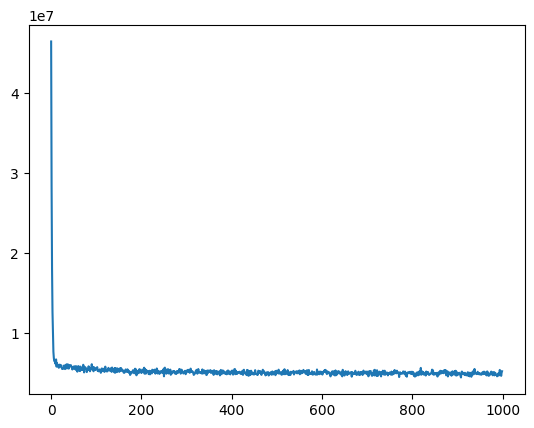

In [25]:
lr = LinearRegression(X_train, y_train, X_validation, y_validation)

theta_gradient_descent, epochs_error_train, epochs_error_validation = lr.fit(method="gradient_descent", epochs=1000, batch_size=X_train.shape[0])

import matplotlib.pyplot as plt
plt.plot(epochs_error_train)

y_predict_gradient_descent = X_train @ theta_gradient_descent
mse = np.sum((y_train - y_predict_gradient_descent) ** 2) / X_train.shape[0]
rse = np.sqrt(mse)
print(f"RSE para treinamento por descida de gradiente: {rse}")

y_predict_validation_gradient_descent = X_validation @ theta_gradient_descent
mse_validation = np.sum((y_validation - y_predict_validation_gradient_descent) ** 2) / X_validation.shape[0]
rse_validation = np.sqrt(mse_validation)
print(f"RSE para validação com descida de gradiente: {rse_validation:.2f}")

> **Quais foram suas conclusões? (1-2 parágrafos)**




Construímos um modelo de regressão linear com implementações de solução analítica e descida do gradiente. Rodamos ambos métodos para o mesmo conjunto de dados e chegamos em um resultado satisfatório de aproximadamente 2975 de erro para a solução analítica e aproximadamente 3010 de erro para a solução por descida de gradiente, ambos valores associados à etapa de treinamento. Juntamente, usamos os parâmetros encontrados em ambos métodos para avaliar o conjunto de dados de validação, e embora um aumento no erro, não é considerado grande, sendo equivalente a no máximo 10% do valor encontrado durante a primeira etapa. Conclui-se, portanto, que ambos métodos funcionaram assim como desejado, alcançando um resultado satisfatório e não "overfittado", observação essa possível devido a variação entre treinamento e validação.

3. (0,75 pontos) Experimente diferentes valores de *learning rates* para a descida de gradiente (GD). Plote o histórico da função de custo (função de custo vs. número de épocas) no conjunto de treinamento e no de validação para cada experimento.



 --- Realizando regressão linear por descida do gradiente com learning rate = 0.0001 ---
RSE para treinamento: 3563.2084242892306
RSE para validação: 4035.296493722521
 --- Realizando regressão linear por descida do gradiente com learning rate = 0.005 ---
RSE para treinamento: 3191.3904520726132
RSE para validação: 3597.2487148848363
 --- Realizando regressão linear por descida do gradiente com learning rate = 0.08 ---
RSE para treinamento: 1.5963636832513098e+56
RSE para validação: 1.611644322747913e+56


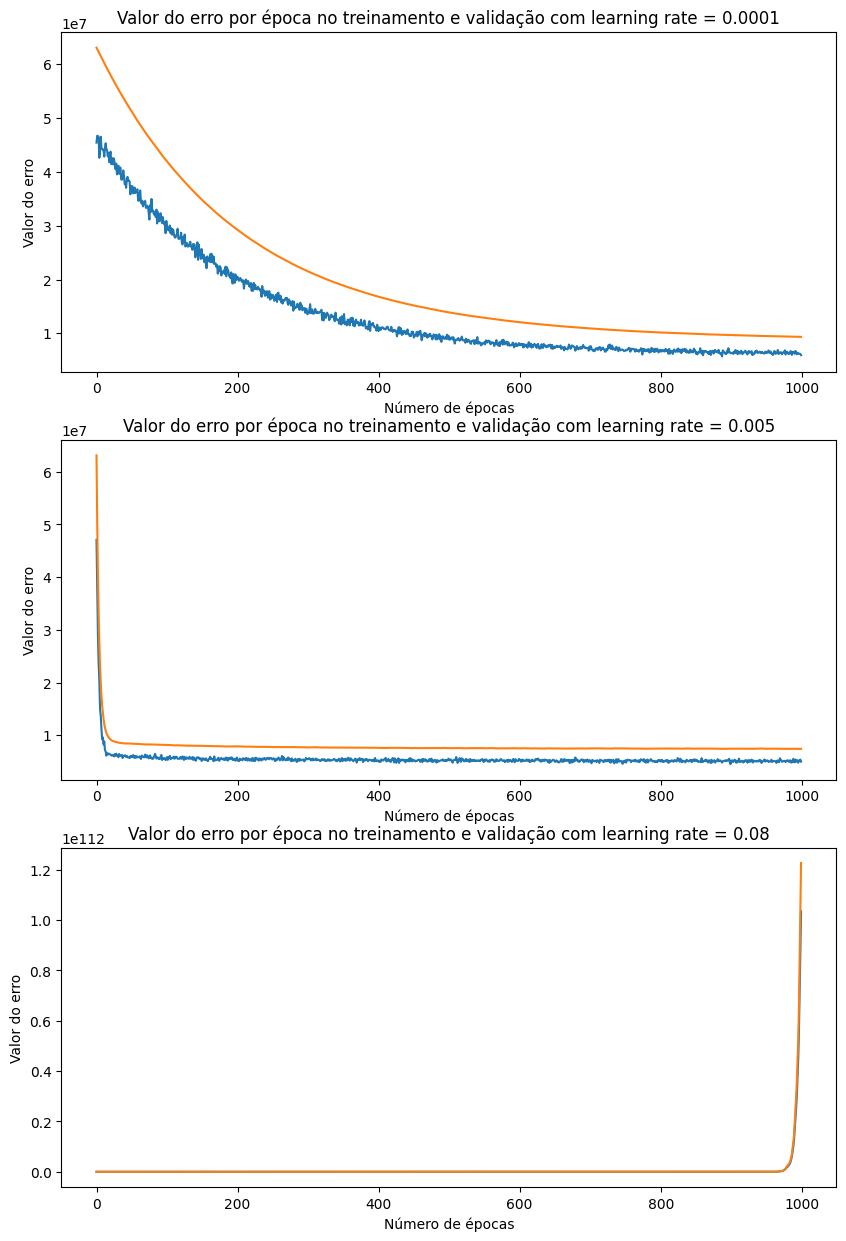

In [26]:
# TODO: Descida do gradiente (GD) com 3 diferentes learning rates.

lr = LinearRegression(X_train, y_train, X_validation, y_validation)

learning_rates = [0.0001, 0.005, 0.08]
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for alpha, ax in zip(learning_rates, axes):
    print(f" --- Realizando regressão linear por descida do gradiente com learning rate = {alpha} ---")
    ax.set_title(f"Valor do erro por época no treinamento e validação com learning rate = {alpha}")

    # Fittando modelo para descida de gradiente conforme o learning rate da iteração
    theta_grad_descent, epochs_error_train, epochs_error_validation = lr.fit(method="gradient_descent", epochs=1000, batch_size=X_train.shape[0], alpha=alpha)

    # Calculado erro total no treinamento para descida do gradiente com learning da iteração
    y_predict_grad_descent_train = X_train @ theta_grad_descent
    mse = np.sum((y_train - y_predict_grad_descent_train) ** 2) / X_train.shape[0]
    rse = np.sqrt(mse)
    print(f"RSE para treinamento: {rse}")
    # Plotando gráfico de erro por época no treinamento
    ax.plot(epochs_error_train)
    ax.set_xlabel("Número de épocas")
    ax.set_ylabel("Valor do erro")

    # Calculando erro total na validação para descida do gradiente com learning rate da iteração
    y_predict_grad_descent_validation = X_validation @ theta_grad_descent
    mse = np.sum((y_validation - y_predict_grad_descent_validation) ** 2) / X_validation.shape[0]
    rse = np.sqrt(mse)
    print(f"RSE para validação: {rse}")
    # Plotando gráfico de erro por época no treinamento
    ax.plot(epochs_error_validation)
    ax.set_xlabel("Número de épocas")
    ax.set_ylabel("Valor do erro")


> **Quais foram suas conclusões? (1-2 parágrafos)**




Primeiramente tentamos avaliar a descida de gradiente implementada com um *learning rate* perto de 1 e, devido, em parte, ao grande número de épocas, tal valor ocasionava em um aumento exponencial do erro, gerando, inclusive, erros de *overflow*. Partimos, então, para uma análise com valores menores de learning rate, optando por 0.0001, 0.005 e 0.08. No primeiro, assim como pode ser observado no primeiro gráfico acima, o modelo convergiu, porém muito lentamente, necessitando de aproximadamente 600-700 épocas para tal. Mas, uma vez que estabilizado, alcançou valores de erro não muito maiores que os obtidos originalmente (perto de 12% a mais). Com o segundo valor de teste, devido a proximidade com o valor original, o modelo se comportou de forma muito semelhante, convergindo logo após as primeiras épocas e alcançando valores de erro extremamente próximos aos originais, mas ainda sim maiores. Já com o último valor testado (0.08), por mais que não irrazoavelmente grande, era oito vezes maior do que o valor original. Tal diferença ficou explícita nos nossos resultados, já que o modelo divergiu para valores exorbitantes e inutilizáveis. Tal resultado pode ser visualizado no último gráfico dos 3 acima.

 4. (0,25 pontos) Compare o seu melhor experimento baseado em GD com a sua implementação da equação normal.

#### Comparação feita na conclusão, vide simplicidade e proximidade dos modelos

> **Quais foram suas conclusões? (1-2 parágrafos)**




Vimos que embora haja uma diferença nos resultados obtidos entre os métodos utilizados, isto é, descida do gradiente e equação normal, tal diferença foi pequena, ao ponto de tornar a escolha entre ambos métodos irrelevante. Com a equação normal, que supostamente encontra a solução ótima, obtivemos valores de erro iguais a 2975 e 3399 para as etapas de treinamento e validação respectivamente; com a solução por descida de gradiente, os valores de erro foram 3114 e 3583 para as mesmas etapas. É claro, portanto, que a solução analítica, isto é, por equação normal, alcançou um resultado melhor e é a decisão ótima. No entanto, caso tivessemos um número de dados muito maior, tornara-se extremamente lento devido sua complexidade computacional, tornando-se necessário utilizar a descida de gradiente. Porém, como agora discutido e observado empiricamente com os testes realizados, essa segunda opção não implicaria em um aumento grande no erro do modelo.

5. (1,25 pontos) Implementa e execute duas regressões lineares utilizando sklearn:

  1. Execute uma regressão com `sklearn.linear_model.SGDRegressor`, que utiliza descida do gradiente minimizando uma função de custo regularizada.
  2. Execute uma regressão com `sklearn.linear_model.LinearRegression`, que utiliza o método da equação normal.

  Compare os resultados obtidos com as suas implementações (de GD e da equação normal).

  Ou seja, compare o `sklearn.linear_model.SGDRegressor` com a sua implementação da descida do gradiente e o `sklearn.linear_model.LinearRegression` com a sua implementação da equação normal.

  > **Observação:** Utilize uma learning rate igual a algum dos experimentos que já fez para realizar uma comparação justa.


In [27]:
# -----------------------------------------------------------------
# Regressão Linear utilizando sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression as LinearRegressionSKLearn
from sklearn.metrics import root_mean_squared_error

lr = LinearRegressionSKLearn()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_validation)
rse = root_mean_squared_error(y_validation, y_predict)
print(f"RSE para treino com regressão linear por equação normal com implementação do sklearn: {rse}")


# -----------------------------------------------------------------
# Regressão Linear utilizando sklearn.linear_model.SGDRegressor
from sklearn.linear_model import SGDRegressor
lr = SGDRegressor(alpha=0.01)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_validation)
rse = root_mean_squared_error(y_validation, y_predict)
print(f"RSE para treino com regressão linear por descida do gradiente com implementação do sklearn: {rse}")


RSE para treino com regressão linear por equação normal com implementação do sklearn: 3110.2417800928333
RSE para treino com regressão linear por descida do gradiente com implementação do sklearn: 3450.0624318326854


> **Quais foram suas conclusões? (1-2 parágrafos)**




Primeiramente rodamos a nossa implementação de regressão linear por equação normal e por descida de gradiente, obtendo 3110 e 3586, respectivamente, como valores de raiz do erro quadrático médio (RMSE) quando avaliados nosso modelo nos dados de validação. Posteriormente, rodamos a implementação da biblioteca sklearn, obtendo 3110 e 3564 como RMSE do método por equação normal e da descida de gradiente. Assim, é trivial observar que ambos métodos ocasionaram em resultados extremamente semelhantes, praticamente iguais, permitindo-nos afirmar que as nossas implementações de descida do gradiente e de equação normal estão, além de corretas, estão satisfatoriamente próximas da implementação da biblioteca.

6. (0,4 ponto) Às vezes, precisamos de alguma função mais complexa para fazer uma boa predição. Elabore e avalie um modelo de Regressão Polinomial.

In [28]:
# TODO: Regressão polinomial. Está liberado utilizar scikit-learn.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LinearRegressionSKLearn

pr = PolynomialFeatures(degree=2)
X_poly = pr.fit_transform(X_train)

lr = LinearRegressionSKLearn()
lr.fit(X_poly, y_train)

y_predict_poly_regression = lr.predict(X_poly)


mse = np.sum((y_train - y_predict_poly_regression) ** 2) / X_train.shape[0]
rse = np.sqrt(mse)
print(f"RSE para treino da regressão polinomial: {rse}")

# Testando regressão polinomial para conjunto de validação

X_poly = pr.fit_transform(X_validation)

y_predict_poly_regression = lr.predict(X_poly)

mse = np.sum((y_validation - y_predict_poly_regression) ** 2) / X_validation.shape[0]
rse = np.sqrt(mse)
print(f"RSE para validação da regressão polinomial: {rse}")



RSE para treino da regressão polinomial: 2306.6806681427397
RSE para validação da regressão polinomial: 6492.561906170584


> **Quais foram suas conclusões? (1-2 parágrafos)**




Para implementarmos o modelo de regressão polinomial, utilizamos a implementação de regressão linear do sklearn, mas o avaliamos com nossa matriz X transformada para features polinomiais. O grau máximo que aplicavamos nessa transformação estava associado ao grau máximo do polinômio que encontraríamos para o modelo. Assim, testamos realizar essa regressão polinomial com diferentes valores de grau máximo, mais especificamente 2, 3, e 4. Logo no primeiro caso citado, isto é, grau máximo de polinômio 2, já nos deparamos com um *overfitting* do modelo, já que, embora demonstrasse um erro menor do que os observados para as regressões lineares para o treinamento, esse RMSE praticamente triplicou, demonstrando que os parâmetros encontrados no treinamento estavam se adaptando muito específica aos dados passados. Por fins de experimentação, decidimos por também testar o mesmo processo com os outros valores de grau máximo citados (3 e 4) e, como esperado apriori, tais modelos também "overfittaram", resultando em parâmetros extremamente específicos e erros cada vez maiores para o conjunto de dados de validação.

## Regressão Logística

Esta parte do trabalho visa prever a faixa salarial dos profissionais, descrita pelo atributo `faixa_salarial`, com base em seus dados demográficos e informações de carreira. Portanto, não utilize os atributos `salario` e `faixa_salarial` como *features* dos seus modelos, apenas para o cálculo da função de custo durante o treinamento e a validação.

### Atividades

#### 1. (0,1 pontos) Faça a seleção das features mais importantes para o treinamento da sua regressão logística, com base em sua análise exploratória.

In [29]:
# Como a regressão logística busca uma relação linear entre as features e as variáveis dependentes,
# também iremos utilizar a matriz de correlação para a seleção dos atributos utilizados 
# para predição da faixa salarial

# Seleção de features com maior correlação com faixa_salarial
# Threshold de 0.2
correlation_salary = df.corr()['faixa_salarial'].sort_values(ascending=False)
correlation_salary = abs(correlation_salary)
correlation_salary = correlation_salary[correlation_salary > 0.2]
correlation_salary = correlation_salary.drop(['salario', 'faixa_salarial'])

selected_features = list(correlation_salary.index)

#### 2. (1,0 pontos) Faça uma Regressão Logística Multinomial. Ela é uma generalização da Regressão Logística para o caso em que queremos lidar com várias classes.

    Use a classe `sklearn.linear_model.SGDClassifier`, passando o parâmetro `loss="log_loss"` no construtor, para criar uma Regressão Logística a ser otimizada por descida do gradiente.

    Experimente diferentes valores de learning rate e avalie o impacto desse hiperparâmetro no treinamento do modelo.

In [30]:
selected_features.append("bias")

# Divisão entre conjuntos de treinamento e validação para a regressão logística
X = df[selected_features].to_numpy()
y = df["faixa_salarial"].to_numpy()
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Regressão logística com base nos modelos do sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


classifier = SGDClassifier(loss="log_loss", random_state=42) # usando critério de parada padrão (loss > best_loss - tol)

classifier.fit(X_train, y_train)
y_prob_predict_logistic_regression = classifier.predict_proba(X_validation)
y_predict_logistic_regression_og = classifier.predict(X_validation)

roc_score = roc_auc_score(y_validation, y_prob_predict_logistic_regression, multi_class="ovr")
print(f"ROC AUC Score para regressão logística: {roc_score}")

accuracy = accuracy_score(y_validation, y_predict_logistic_regression_og)
print(f"Acurácia para regressão logística: {accuracy}")

ROC AUC Score para regressão logística: 0.8393923324546845
Acurácia para regressão logística: 0.3330106485963214


In [32]:
# testando diferentes valores de learning rate para a regressão logística

# válido notar que o learning rate por padrão da biblioteca é 0.0001
learning_rates = [0.001, 0.01, 0.1, 1]
for alpha in learning_rates:
    print(f" --- Realizando regressão logística com learning rate = {alpha} --- ")

    classifier = SGDClassifier(loss="log_loss", learning_rate="constant", eta0=alpha, random_state=42)

    classifier.fit(X_train, y_train)
    y_prob_predict_logistic_regression_test = classifier.predict_proba(X_validation)
    y_predict_logistic_regression = classifier.predict(X_validation)

    roc_score = roc_auc_score(y_validation, y_prob_predict_logistic_regression_test, multi_class="ovr")
    print(f"ROC AUC Score = {roc_score}")

    accuracy = accuracy_score(y_validation, y_predict_logistic_regression)
    print(f"Acurácia = {accuracy}")


 --- Realizando regressão logística com learning rate = 0.001 --- 
ROC AUC Score = 0.7429490454193354
Acurácia = 0.30493707647628265
 --- Realizando regressão logística com learning rate = 0.01 --- 
ROC AUC Score = 0.8274166227981534
Acurácia = 0.3291384317521781
 --- Realizando regressão logística com learning rate = 0.1 --- 
ROC AUC Score = 0.8024182106471887
Acurácia = 0.17618586640851888
 --- Realizando regressão logística com learning rate = 1 --- 
ROC AUC Score = 0.7693558799290674
Acurácia = 0.17037754114230397


> **Quais foram suas conclusões? (1-2 parágrafos)**




Assim como comentado no código, a biblioteca sklearn e sua class SGDClassifier utilizam um *learning rate* conforme uma expressão pré-definida, podendo ser lida na documentação completa. Assim, para experimentarmos com diferentes valores, foi necessário alterar o parâmetro "learning_rate" para "constant" e alterar, ao longo das iterações, o valor do parâmetro "eta0" para o *learning rate* desejado. Reconhece-se que mexer no *learning rate* implica, portanto, em mexer mais de um parâmetro, diferentemente dos casos abordados nas questões anteriores. Como "eta0", por padrão, equivale a 0, optamos por testar diferentes valores, todos maiores mas com grau de distanciamento também crescente. Mais especificamente, os valores testados foram 0.001, 0.01, 0.1 e 1. É importante ressaltar também que levamos em consideração como métricas apenas ROC_AUC score e a acurácia do modelo. 

No primeiro caso (0.001), tivemos uma diminuição do ROC_AUC e da acurácia, atingindo, aproximadamente, 0.31. Já no próximo teste, incrementando ainda mais o hiperparâmetro em discussão, observamos uma melhora no modelo, já que aproximamos e ultrapassamos, pela primeira e única vez dentre os valores testados, tanto a acurácia quanto o ROC_AUC score dos seus primeiros valores. Nos últimos dois casos, porém, foi observado empiricamente que aumentar ainda mais o valor de "eta0" apenas contribuia com o declínio da performance do modelo, já que tanto o ROC_AUC score quando a acurácia diminuiram, atingindo os piores valores de todos os observados. Conclui-se, portanto, que o cenário com melhores resultados foi encontrado na instanciação do modelo com "eta0" igual a 0.01, tornando-se interessante se distanciar do funcionamento padrão.

3. (0,75 ponto) Faça um gráfico da função de custo vs. número de épocas, em relação ao conjunto de treinamento e ao conjunto de validação. Também faça um gráfico, de mesma estrutura, descrevendo a acurácia vs. número de época.

    Como é o comportamento do modelo? O modelo está aprendendo?

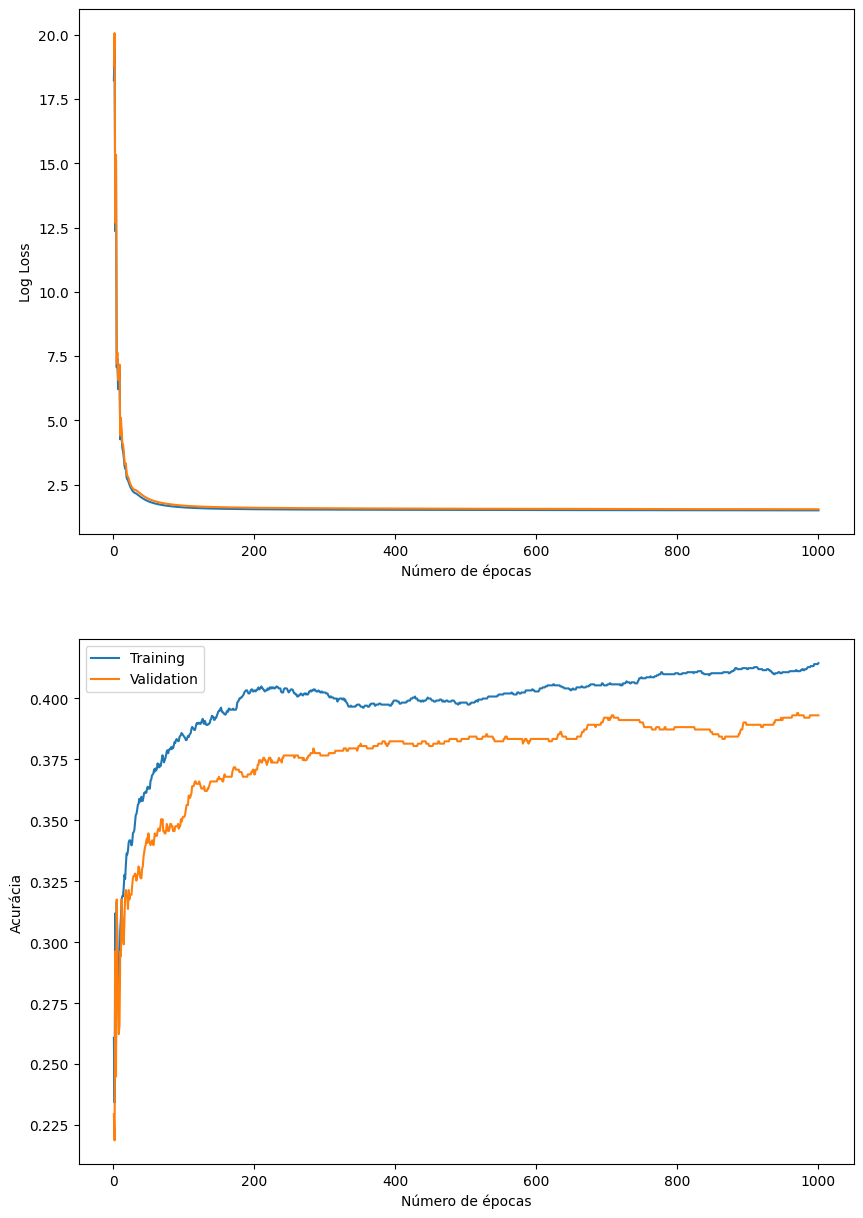

In [33]:
from sklearn.metrics import log_loss

classifier = SGDClassifier(loss="log_loss", max_iter=1, random_state=42, warm_start=True, learning_rate='optimal')

n_epochs = 1000
train_errors = []
train_accuracy = []
validation_errors = []
validation_accuracy = []

for epoch in range(n_epochs):
    classifier.partial_fit(X_train, y_train, classes=np.unique(y))  # Partial fit for one epoch
    
    # Predictions and log loss for training set
    y_train_prob = classifier.predict_proba(X_train)
    train_loss = log_loss(y_train, y_train_prob)
    accuracy = accuracy_score(y_train, classifier.predict(X_train))
    train_errors.append(train_loss)
    train_accuracy.append(accuracy)
    
    # Predictions and log loss for validation set
    y_validation_prob = classifier.predict_proba(X_validation)
    validation_loss = log_loss(y_validation, y_validation_prob)
    accuracy = accuracy_score(y_validation, classifier.predict(X_validation))
    validation_errors.append(validation_loss)
    validation_accuracy.append(accuracy)


fig, axes = plt.subplots(2, 1, figsize=(10, 15))
axes[0].plot(range(1, n_epochs + 1), train_errors, label='Training')
axes[0].set_xlabel("Número de épocas")
axes[0].set_ylabel("Log Loss")
axes[0].plot(range(1, n_epochs + 1), validation_errors, label='Validation')

axes[1].plot(range(1, n_epochs + 1), train_accuracy, label='Training')
axes[1].set_xlabel("Número de épocas")
axes[1].set_ylabel("Acurácia")
axes[1].plot(range(1, n_epochs + 1), validation_accuracy, label='Validation')

plt.legend()
plt.show()

In [34]:
# Código para adaptação para submissão no desafio do Kaggle
X_test = df_test[selected_features].to_numpy()
y_predict_class = classifier.predict(X_test)
y_predict_class = encoder_faixa_salarial.inverse_transform(y_predict_class.reshape(-1, 1))
y_predict_class = pd.DataFrame(y_predict_class, columns=["faixa_salarial"], index=df_test.id)
y_predict_class.to_csv("test_data_predicted_logistic_regression.csv")

> **Quais foram suas conclusões? (1-2 parágrafos)**




Analisando ambos gráficos acima, é possível afirmar de cara que o modelo utilizado aprendeu conforme o avançar das épocas. No primeiro gráfico, observa-se que o erro na predição do modelo caiu rapidamente nas primeiras épocas, estabilizando-se, aproximadamente na época 40, no valor final obtido. Para mais, é visível também, pelo segundo gráfico, que a acurácia aumentou rapidamente no início do processo de treinamento e de validação. 

É importante ressaltar que, tanto em relação ao erro quanto em relação à acurácia, o modelo apresentou um desempenho pior na etapa de validação. Porém, a distância entre o desempenho do treino e dessa última etapa é natural e importante, demonstrando que os parâmetros encontrados não estavam se "overfittando" aos dados de treinamento, ou seja, que não estava ocorrendo uma especialização exagerada do modelo.

4. (0,9 pontos) Faça pelo menos 2 gráficos que visualizem as fronteiras de decisão entre duas *features*. Por exemplo, você pode fazer um gráfico da fronteira de decisão entre os atributos `tempo_exp_dados` e `satisfacao_empresa`, caso tenha utilizado essas *features*. Verifique se está fazendo o plot para atributos relevantes utilizados em seu modelo.

    > **Observação:** [Este tutorial](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py) do scikit-learn demonstra como extrair essas informações do `sklearn.linear_model.SGDClassifier`.

In [35]:
# TODO: Faça a visualização das fronteiras de decisão. Você pode usar as bibliotecas scikit-learn, seaborn, matplotlib, etc.

> **Quais foram suas conclusões? (1-2 parágrafos)**




*Escreva as conclusões aqui.*

5. (0,75 pontos) Avalie os resultados do seu modelo, utilizando métricas de classificação que achar relevante. Plote a matriz de confusão e analise os resultados.

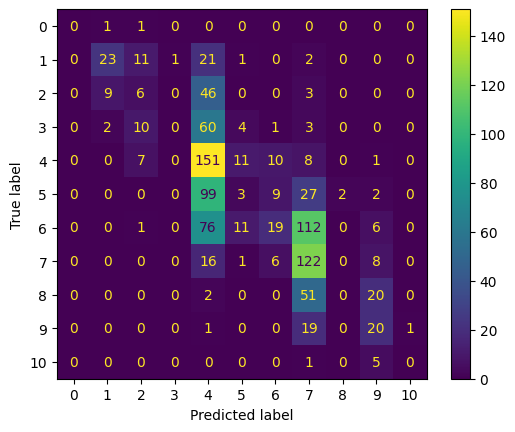

In [36]:
# TODO: Avalie o seu modelo de classificação. Você pode usar as bibliotecas scikit-learn, seaborn, matplotlib, etc.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_validation, y_predict_logistic_regression_og)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

confusion_matrix_display.plot()
plt.show()

> **Quais foram suas conclusões? (1-2 parágrafos)**


*Escreva as conclusões aqui.*

## Submissão dos resultados no Kaggle

Para avaliar o desempenho do seu modelo, você deve submeter suas predições, no conjunto de teste, na competição [Tarefa #2 de MC886/MO444 2024S2](https://www.kaggle.com/t/20fa042c08f5453abd89d946468bd3de) do Kaggle.

A plataforma calculará automaticamente a métrica de avaliação e fornecerá um score.

> **Observação:** Não se preocupe apenas com o resultado do seu modelo. O seu score no placar não irá influenciar a sua nota nesta atividade :).

### Atividades

1. (1,0 pontos) Escolha **seus melhores modelos** para as duas tarefas feitas (regressão e classificação) e faça a predição dos atributos `salario` e `faixa_salarial` com base nos dados da pesquisa contidos no **conjunto de teste**.

  **Gere um arquivo de submissão, de tipo CSV, no formato adequado:** Gere uma linha por pessoa no conjunto de teste, com as duas colunas para os valores preditos, que devem estar nomeadas como **`salario`** e **`faixa_salarial`**.

  > Exemplo de arquivo (com o cabeçalho e conteúdo formatados):
  > ```
  > id, salario, faixa_salarial
  > 1, 0.0, "de R$ 0/mês a R$ 0/mês"
  > 2, 0.0, "de R$ 0/mês a R$ 0/mês"
  > 3, 0.0, "de R$ 0/mês a R$ 0/mês"
  > ```

  Submeta suas predições na competição [Tarefa #2 de MC886/MO444 2024S2](https://www.kaggle.com/t/20fa042c08f5453abd89d946468bd3de) no Kaggle.

  Conte para a gente! Qual foi o resultado que você obteve na competição? :)

Até o momento, na competição associada à regressão linear, ficamos posicionados em 9º lugar, com um score igual a 85960695.42545. Já na competição da regressão logística, estamos em 2º lugar, com score de 0.33964.

## Informações sobre prazo e envio

### Prazo

09 de outubro, quarta-feira, 23:59.

Política de penalidade para submissões atrasadas: Você não está sendo encorajada(o) a submeter o trabalho depois da data de submissão. Entretanto, caso isso aconteça, a nota será penalizada da seguinte forma:
- 10 de outubro, 23:59: nota * 0,75
- 11 de outubro, 23:59: nota * 0,5
- 12 de outubro, 23:59: nota * 0,25


### Envio

No Google Classroom, envie seu Jupyter Notebook, no formato RA1_RA2_2024s2_mc886mo444_tarefa_02.ipynb.

**Esta atividade NÃO é individual, deve ser realizada em dupla (grupo de duas pessoas).**
